# **LPU Smart Prep**

# loading data

In [2]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/saurabh-kud/Site_Image/master/marks.csv')
df

,FirstScore,SecondScore,ThirdScore,FourthScore,FifthScore,Passed
0,50,60,70,80,90,1
1,40,50,60,70,80,1
2,20,40,23,42,50,0
3,20,50,50,20,45,0
4,50,60,80,12,45,1
...,...,...,...,...,...,...
175,20,40,60,80,60,1
176,30,50,40,60,60,1
177,10,20,10,15,60,0
178,15,10,20,10,42,0


# data prepration

### Data separation as X and y

In [3]:
y = df['Passed']
y

0      1
1      1
2      0
3      0
4      1
      ..
175    1
176    1
177    0
178    0
179    1
Name: Passed, Length: 180, dtype: int64

In [4]:
X = df.drop('Passed', axis=1)
X

,FirstScore,SecondScore,ThirdScore,FourthScore,FifthScore
0,50,60,70,80,90
1,40,50,60,70,80
2,20,40,23,42,50
3,20,50,50,20,45
4,50,60,80,12,45
...,...,...,...,...,...
175,20,40,60,80,60
176,30,50,40,60,60
177,10,20,10,15,60
178,15,10,20,10,42


## Data splitting

In [5]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [6]:
X_train
y_train

164    1
120    1
95     0
165    0
29     1
      ..
87     0
103    1
67     1
24     1
8      1
Name: Passed, Length: 144, dtype: int64

In [7]:
X_test
y_test

88     0
145    1
11     0
74     1
173    1
150    1
151    1
97     1
90     1
96     1
147    0
65     0
139    1
167    1
99     1
15     0
146    1
7      1
77     1
41     0
101    0
32     0
119    1
92     0
40     0
1      1
75     0
115    1
64     1
161    0
148    0
69     1
26     1
171    0
114    1
142    0
Name: Passed, dtype: int64

# **Model Building**

## **Linear Regression**

### **Training the model**

In [30]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X, y)

LinearRegression()

### **Applying the model to make a prediction**

In [31]:
y_lr_train_pred = lr.predict(X)
y_lr_test_pred = lr.predict(X)

In [32]:
y_lr_train_pred


array([ 1.10191095,  0.89830397,  0.40081081,  0.45359145,  0.72306118,
        0.15683538,  0.83020713,  0.9655891 ,  1.15754491,  0.83020713,
        0.11911522,  0.03342913,  1.1204556 ,  0.89194096,  0.70705874,
       -0.04074948, -0.02269689,  1.1204556 ,  1.1204556 ,  0.89194096,
        0.70705874, -0.04074948, -0.02269689,  1.1204556 ,  1.1204556 ,
        0.89194096,  0.70705874, -0.04074948, -0.02269689,  1.1204556 ,
        1.10191095,  0.89830397,  0.40081081,  0.45359145,  0.72306118,
        0.15683538,  0.83020713,  0.9655891 ,  1.15754491,  0.83020713,
        0.11911522,  0.03342913,  1.1204556 ,  0.89194096,  0.70705874,
       -0.04074948, -0.02269689,  1.1204556 ,  1.1204556 ,  0.89194096,
        0.70705874, -0.04074948, -0.02269689,  1.1204556 ,  1.1204556 ,
        0.89194096,  0.70705874, -0.04074948, -0.02269689,  1.1204556 ,
        1.10191095,  0.89830397,  0.40081081,  0.45359145,  0.72306118,
        0.15683538,  0.83020713,  0.9655891 ,  1.15754491,  0.83

In [11]:
y_lr_test_pred

array([-0.02135799,  0.88592522,  0.052114  ,  0.71505003,  1.11449426,
        1.09160659,  0.89073306,  0.9737502 ,  1.09160659,  0.82087133,
       -0.0394367 ,  0.16202429,  0.88592522,  1.11449426,  0.82087133,
       -0.0394367 ,  0.71505003,  0.9737502 ,  1.11449426,  0.052114  ,
        0.052114  ,  0.41378057,  1.11449426,  0.41378057,  0.12694728,
        0.89073306, -0.0394367 ,  0.88592522,  0.6776458 ,  0.052114  ,
       -0.02135799,  0.82087133,  0.71505003, -0.0394367 ,  1.11449426,
       -0.02135799])

### **Evaluate model performance**

In [12]:
from sklearn.metrics import mean_squared_error, r2_score

lr_train_mse = mean_squared_error(y_train, y_lr_train_pred)
lr_train_r2 = r2_score(y_train, y_lr_train_pred)

lr_test_mse = mean_squared_error(y_test, y_lr_test_pred)
lr_test_r2 = r2_score(y_test, y_lr_test_pred)

In [13]:
print('LR MSE (Train): ', lr_train_mse)
print('LR R2 (Train): ', lr_train_r2)
print('LR MSE (Test): ', lr_test_mse)
print('LR R2 (Test): ', lr_test_r2)

LR MSE (Train):  0.033847230729947234
LR R2 (Train):  0.8520227332034186
LR MSE (Test):  0.027601003189223757
LR R2 (Test):  0.8864415868786223


In [14]:
lr_results = pd.DataFrame(['Linear regression', lr_train_mse, lr_train_r2, lr_test_mse, lr_test_r2]).transpose()
lr_results.columns = ['Method', 'Training MSE', 'Training R2', 'Test MSE', 'Test R2']

In [15]:
lr_results

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Linear regression,0.033847,0.852023,0.027601,0.886442


## **Random Forest**

### **Training the model**

In [49]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(max_depth=2, random_state=100)
rf.fit(X, y)

RandomForestRegressor(max_depth=2, random_state=100)

### **Applying the model to make a prediction**

In [50]:
y_rf_train_pred = rf.predict(X)
y_rf_test_pred = rf.predict(X)

y_rf_train_pred


array([1.        , 1.        , 0.        , 0.27302785, 0.85533554,
       0.        , 1.        , 1.        , 1.        , 1.        ,
       0.        , 0.        , 1.        , 0.99769231, 1.        ,
       0.        , 0.        , 1.        , 1.        , 0.99769231,
       1.        , 0.        , 0.        , 1.        , 1.        ,
       0.99769231, 1.        , 0.        , 0.        , 1.        ,
       1.        , 1.        , 0.        , 0.27302785, 0.85533554,
       0.        , 1.        , 1.        , 1.        , 1.        ,
       0.        , 0.        , 1.        , 0.99769231, 1.        ,
       0.        , 0.        , 1.        , 1.        , 0.99769231,
       1.        , 0.        , 0.        , 1.        , 1.        ,
       0.99769231, 1.        , 0.        , 0.        , 1.        ,
       1.        , 1.        , 0.        , 0.27302785, 0.85533554,
       0.        , 1.        , 1.        , 1.        , 1.        ,
       0.        , 0.        , 1.        , 0.99769231, 1.     

In [35]:
y_rf_test_pred

array([1.        , 1.        , 0.        , 0.27302785, 0.85533554,
       0.        , 1.        , 1.        , 1.        , 1.        ,
       0.        , 0.        , 1.        , 0.99769231, 1.        ,
       0.        , 0.        , 1.        , 1.        , 0.99769231,
       1.        , 0.        , 0.        , 1.        , 1.        ,
       0.99769231, 1.        , 0.        , 0.        , 1.        ,
       1.        , 1.        , 0.        , 0.27302785, 0.85533554,
       0.        , 1.        , 1.        , 1.        , 1.        ,
       0.        , 0.        , 1.        , 0.99769231, 1.        ,
       0.        , 0.        , 1.        , 1.        , 0.99769231,
       1.        , 0.        , 0.        , 1.        , 1.        ,
       0.99769231, 1.        , 0.        , 0.        , 1.        ,
       1.        , 1.        , 0.        , 0.27302785, 0.85533554,
       0.        , 1.        , 1.        , 1.        , 1.        ,
       0.        , 0.        , 1.        , 0.99769231, 1.     

In [65]:
dummy = pd.DataFrame([[50, 60, 70, 80, 90], [20, 15, 10, 20, 10]], columns=['FirstScore', 'SecondScore', 'ThirdScore', 'FourthScore', 'FifthScore'])

# Now, you can use the loaded model to make predictions
result = rf.predict(dummy)
print(result)

[1. 0.]


In [66]:
import pickle

In [67]:
with open('final_model.pkl', 'wb') as file:
    pickle.dump(rf, file)

In [68]:
with open('final_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)


predictions = loaded_model.predict(dummy)
predictions

array([1., 0.])

### **Evaluate model performance**

In [37]:
from sklearn.metrics import mean_squared_error, r2_score

rf_train_mse = mean_squared_error(y, y_rf_train_pred)
rf_train_r2 = r2_score(y, y_rf_train_pred)

rf_test_mse = mean_squared_error(y, y_rf_test_pred)
rf_test_r2 = r2_score(y, y_rf_test_pred)

In [38]:
rf_results = pd.DataFrame(['Random forest', rf_train_mse, rf_train_r2, rf_test_mse, rf_test_r2]).transpose()
rf_results.columns = ['Method', 'Training MSE', 'Training R2', 'Test MSE', 'Test R2']
rf_results

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Random forest,0.003183,0.986294,0.003183,0.986294


## **Model comparison**

In [21]:
df_models = pd.concat([lr_results, rf_results], axis=0)
df_models

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Linear regression,0.033847,0.852023,0.027601,0.886442
0,Random forest,0.00277,0.987889,0.000442,0.99818


In [22]:
df_models.reset_index(drop=True)

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Linear regression,0.033847,0.852023,0.027601,0.886442
1,Random forest,0.00277,0.987889,0.000442,0.99818


# **Data visualization of prediction results**

Text(0.5, 0, 'Experimental LogS')

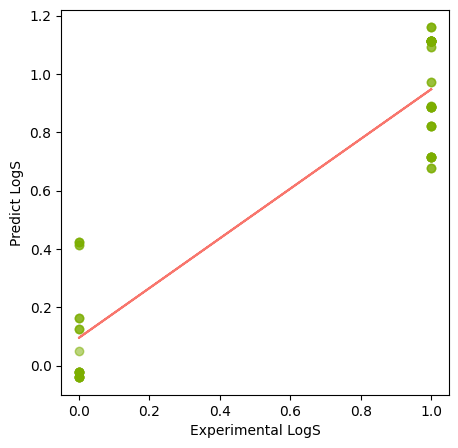

In [23]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(5,5))
plt.scatter(x=y_train, y=y_lr_train_pred, c="#7CAE00" ,alpha=0.3)

z = np.polyfit(y_train, y_lr_train_pred, 1)
p = np.poly1d(z)

plt.plot(y_train, p(y_train), '#F8766D')
plt.ylabel('Predict LogS')
plt.xlabel('Experimental LogS')